<div>
    <h1><center style="background-color:#C39BD3; color:white;">🏠 Housing Prices in Indian Metropolitan Areas</center></h1>
</div>

<div>
<img src="https://i.imgur.com/Q5IhUpF.gif">
</div>

<div class="alert alert-warning">
<p>Being born and brought up in a metropolitan city, I've witnessed the city develop and the housing prices rise depending on the availability of amenities in a particular region.  <br><br>
Now let's delve into the factors that govern the pricing!
</p>
</div>

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Importing Libraries 📚</strong></center></h3>
</div>

In [3]:
!pip install colorama

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px

import graphviz
import networkx as nx

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt

from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [12]:
!pip install geopy 
!pip install Nominatim
!pip install folium

In [6]:


!pip install graphviz

In [7]:
!pip install xgboost

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Custom Color Palette 🎨</strong></center></h3>
</div>

In [8]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

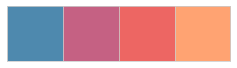

In [49]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Mumbai
</center>

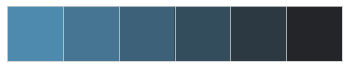

In [50]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Delhi
</center>

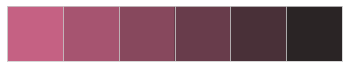

In [51]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:100px; color:white;">
    Bangalore
</center>

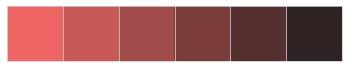

In [52]:
bangalore = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(bangalore),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

<center style="background: #93C0A4; font-size: 20px; padding: 10px; border: 1px solid lightgray; margin: 10px; width:150px; color:white;">
    Hyderabad
</center>

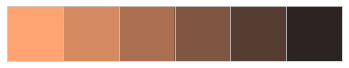

In [53]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

## Loading dataset from Kaggle

In [13]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=df70c323132d7d47b5861ff8b0cf41b914f5c54e195f3cf44a0c28f7a6efa988
  Stored in directory: c:\users\sushmanreddy\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [14]:
!pip install opendatasets

In [15]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india")

Skipping, found downloaded files in ".\housing-prices-in-metropolitan-areas-of-india" (use force=True to force download)


<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Loading the dataset and displaying rows ⌛</strong></center></h3>
</div>

In [19]:
df1 = pd.read_csv('C:\\Users\\sushmanreddy\\Desktop\\project csv files\\Mumbai.csv')
df2 = pd.read_csv('C:\\Users\\sushmanreddy\\Desktop\\project csv files\\Delhi.csv')
df3 = pd.read_csv('C:\\Users\\sushmanreddy\\Desktop\\project csv files\\Hyderabad.csv')
df4 = pd.read_csv("C:\\Users\\sushmanreddy\\Desktop\\project csv files\\Bangalore.csv")

In [20]:
df1.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [21]:
df2.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
df3.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df4.head(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


<div class="alert alert-warning">
<p>📌 '9' was utilised to signify such values, which may indicate the absence of information on the apartment but these values don't ascertain the absence of such a feature in real life, as for a set of residences, nothing was specified about specific facilities..<br><br>
We are dropping these values so that  our analysis dont get affected by outlier.
</p>
</div>

In [24]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [25]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Dataframe shape after dropping values</strong></center></h3>
</div>

In [26]:
print(f"{b_}Mumbai:{r_}{df1.shape}\n")
print(f"{b_}Delhi:{r_}{df2.shape}\n")
print(f"{b_}Bangalore:{r_}{df3.shape}\n")
print(f"{b_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Bangalore:(2434, 40)

Hyderabad:(1951, 40)



In [27]:
print(f"{r_}Data types of data columns: \n{b_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>EDA 📊</strong></center></h3>
</div>

In [28]:
sns.set_style("whitegrid")

In [29]:
def triple_plot(x, title,c):
    #fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    fig, ax = plt.subplots(1,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

In [30]:
def displot(x, title, c):
    plt.figure(figsize=(10,5))
    sns.distplot(x = x, color =c).set_title(title)
    plt.show()

In [31]:
def violinplot(x, title, c):
    plt.figure(figsize=(10,5))
    sns.violinplot(x = x, color =c).set_title(title)
    plt.show()

In [32]:
def boxplot(x, title, c):
    plt.figure(figsize=(10,5))
    sns.boxplot(x = x, color =c).set_title(title)
    plt.show()

C:\Users\sushmanreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


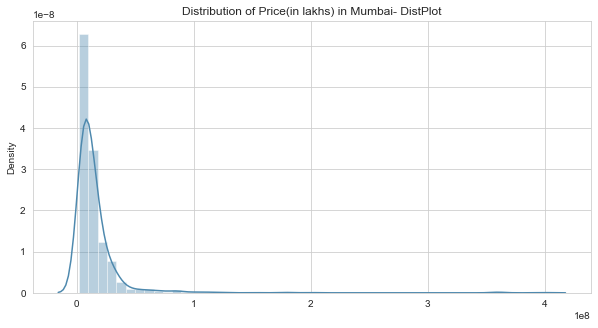

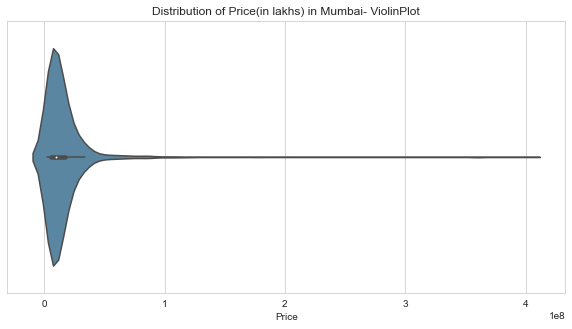

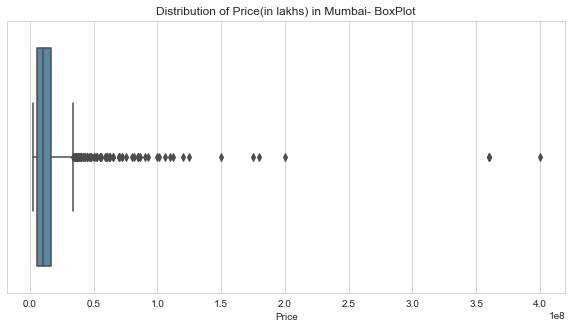

In [33]:
displot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai- DistPlot',custom_colors[0])
violinplot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai- ViolinPlot',custom_colors[0])
boxplot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai- BoxPlot',custom_colors[0])

C:\Users\sushmanreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


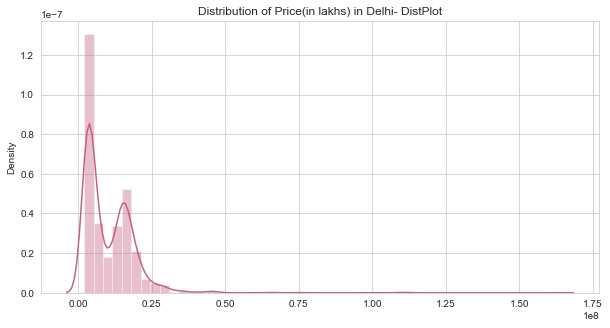

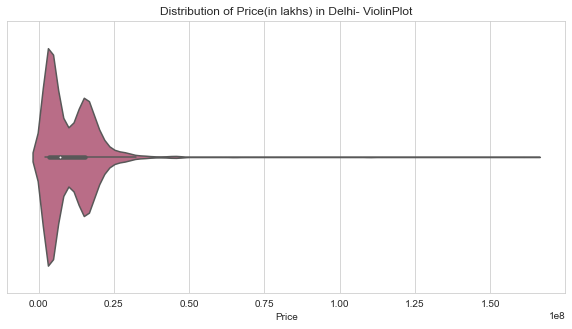

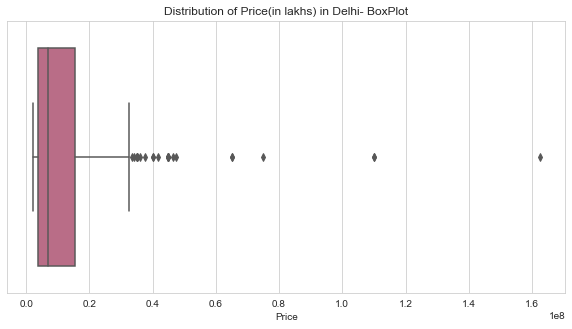

In [34]:
displot(df2['Price'],'Distribution of Price(in lakhs) in Delhi- DistPlot',custom_colors[1])
violinplot(df2['Price'],'Distribution of Price(in lakhs) in Delhi- ViolinPlot',custom_colors[1])
boxplot(df2['Price'],'Distribution of Price(in lakhs) in Delhi- BoxPlot',custom_colors[1])

C:\Users\sushmanreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


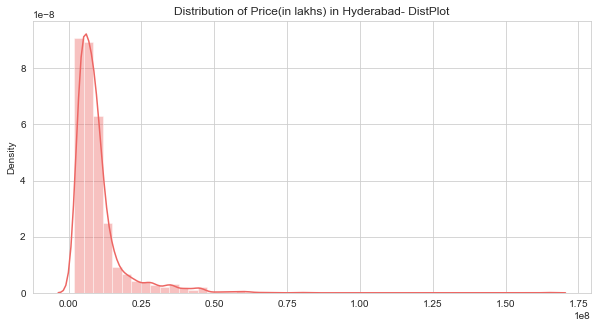

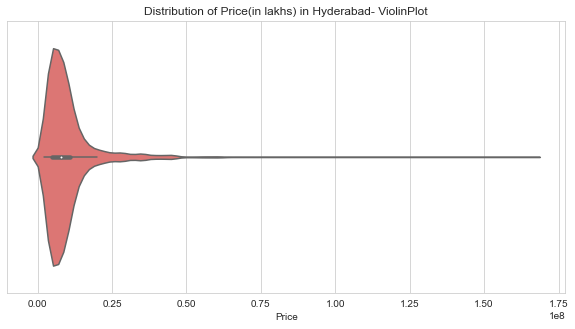

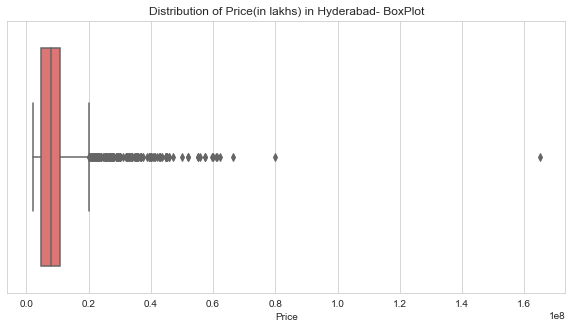

In [35]:
displot(df3['Price'],'Distribution of Price(in lakhs) in Hyderabad- DistPlot',custom_colors[2])
violinplot(df3['Price'],'Distribution of Price(in lakhs) in Hyderabad- ViolinPlot',custom_colors[2])
boxplot(df3['Price'],'Distribution of Price(in lakhs) in Hyderabad- BoxPlot',custom_colors[2])

C:\Users\sushmanreddy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


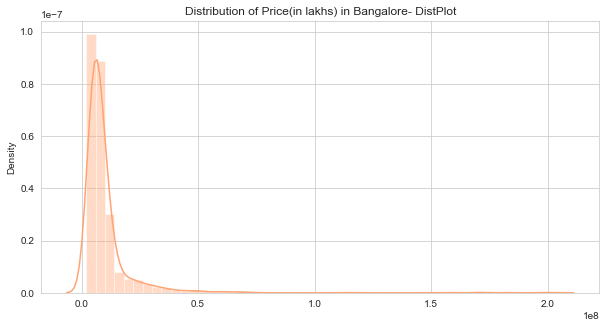

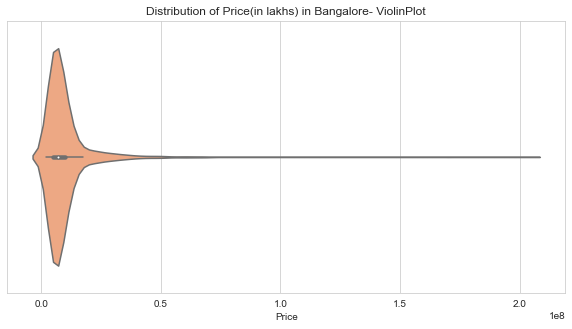

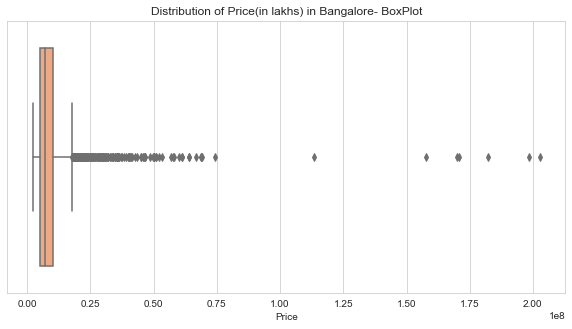

In [36]:
displot(df4['Price'],'Distribution of Price(in lakhs) in Bangalore- DistPlot',custom_colors[3])
violinplot(df4['Price'],'Distribution of Price(in lakhs) in Bangalore- ViolinPlot',custom_colors[3])
boxplot(df4['Price'],'Distribution of Price(in lakhs) in Bangalore- BoxPlot',custom_colors[3])

In [37]:
def count_plot(data,title,p):
    df_new=data[data['Resale']== 0]
    df_resale=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df_new, order=df_new.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Count of New Properties')
    ax[1]=sns.countplot(y='Location', data=df_resale, order=df_resale.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Count of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

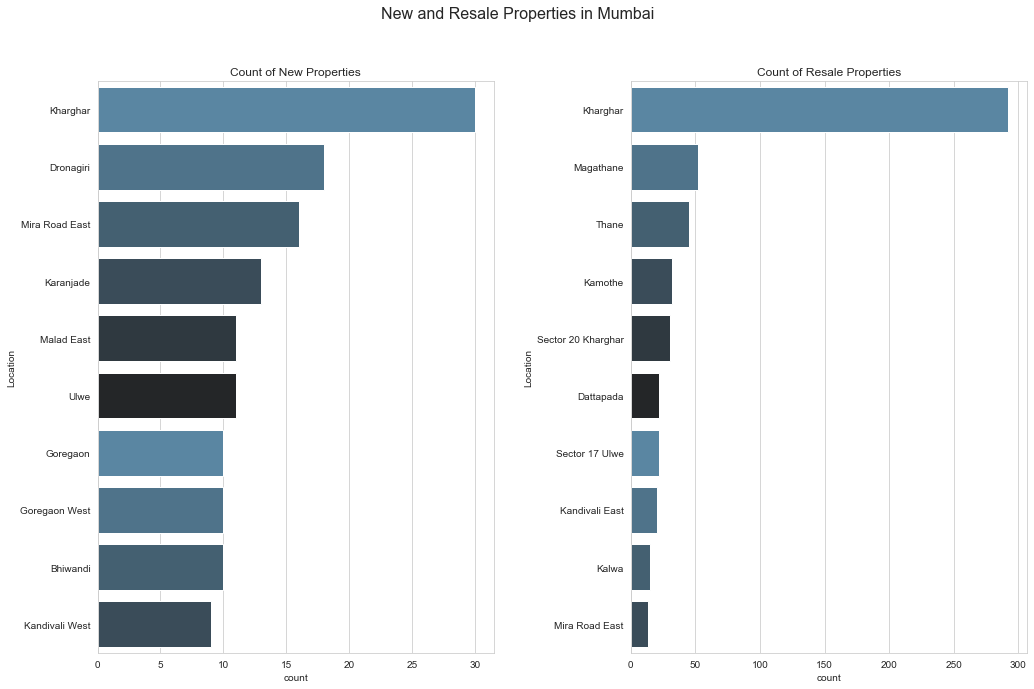

In [54]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

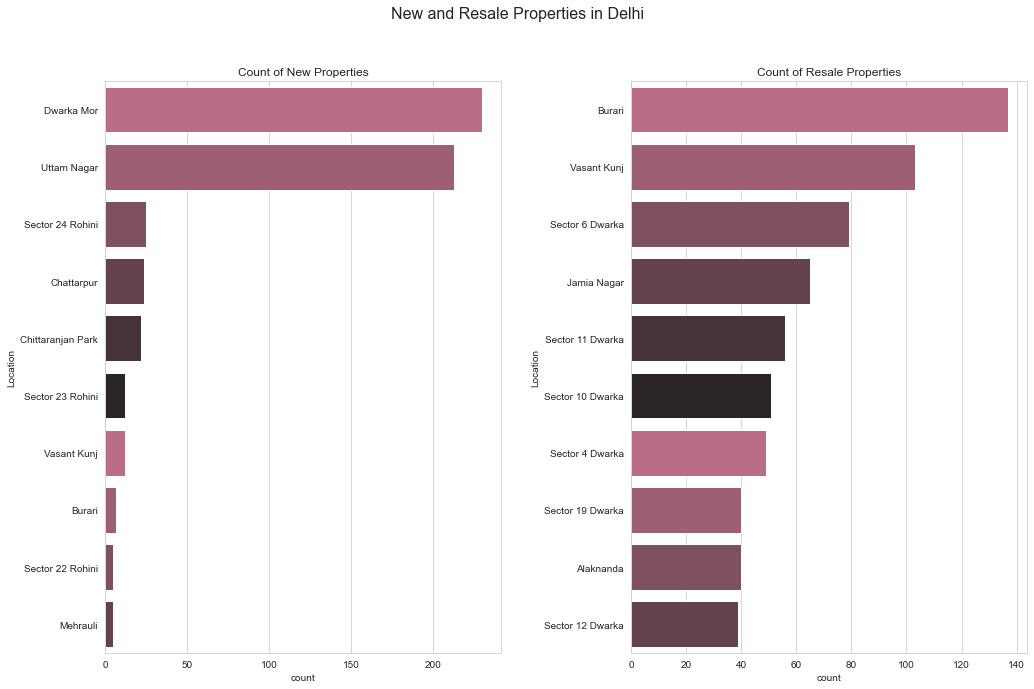

In [55]:
count_plot(df2,'New and Resale Properties in Delhi', delhi)

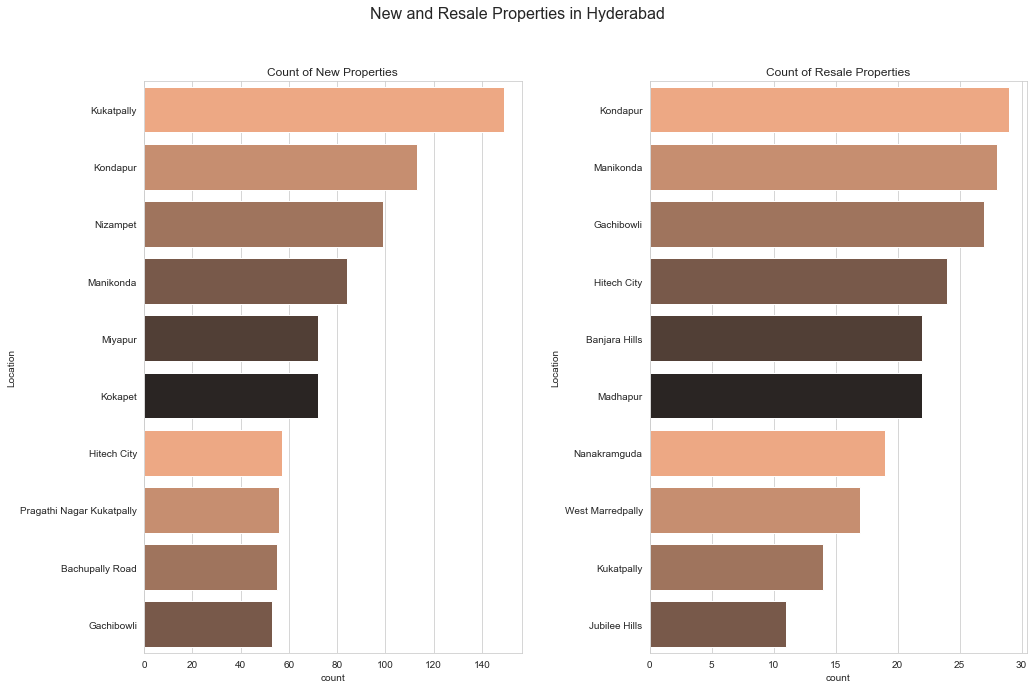

In [56]:
count_plot(df3,'New and Resale Properties in Hyderabad', hyderabad)

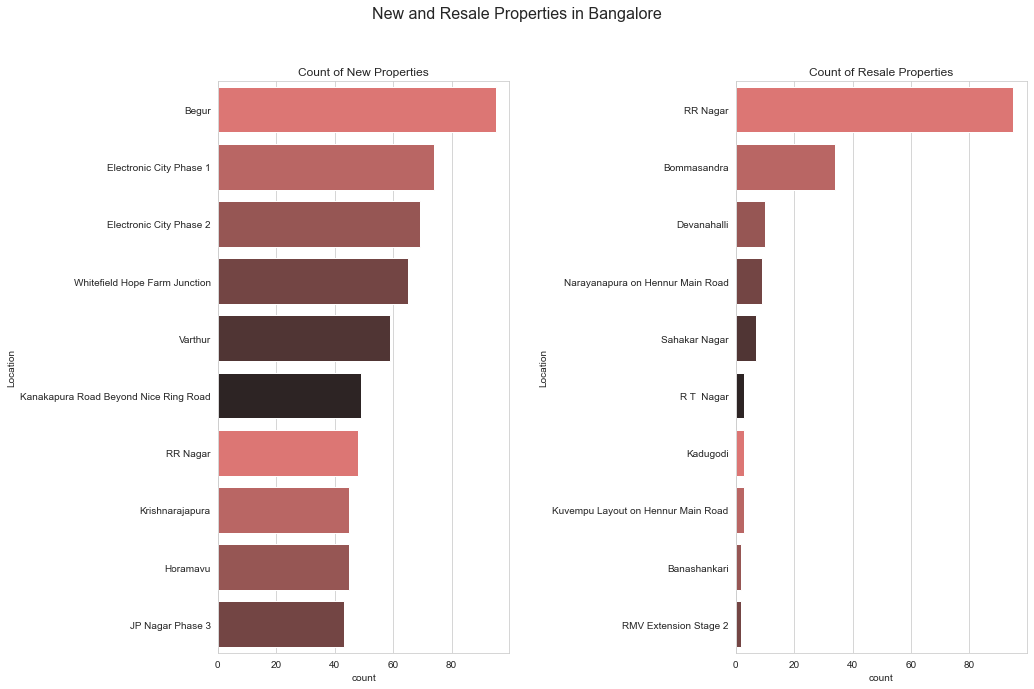

In [57]:
count_plot(df4,'New and Resale Properties in Bangalore',bangalore)

In [58]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('Number of Bedrooms vs Price at '+ title,size=18)
    plt.gcf().set_size_inches(8,10)
    plt.show()

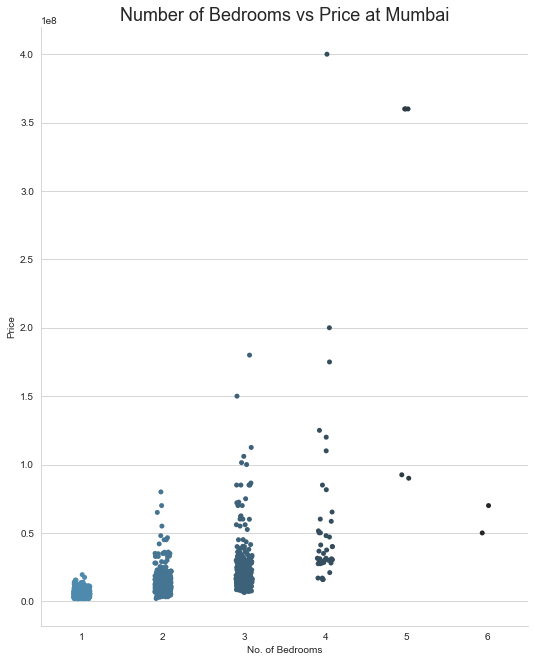

In [59]:
cat_plot(df1,'Mumbai',mumbai)

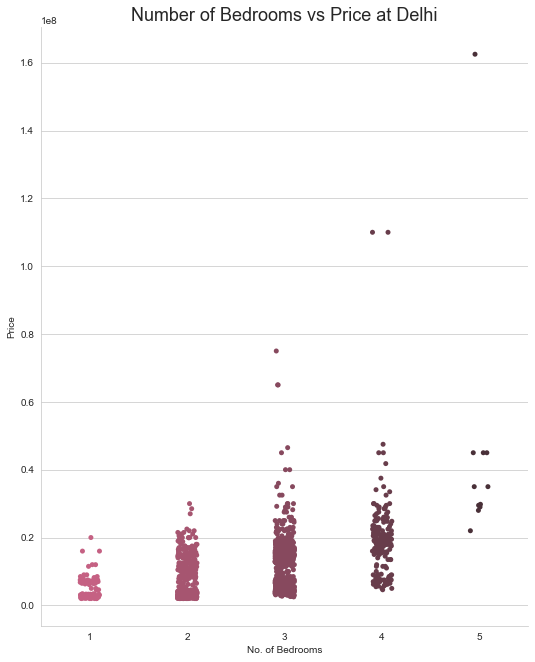

In [60]:
cat_plot(df2,'Delhi',delhi)

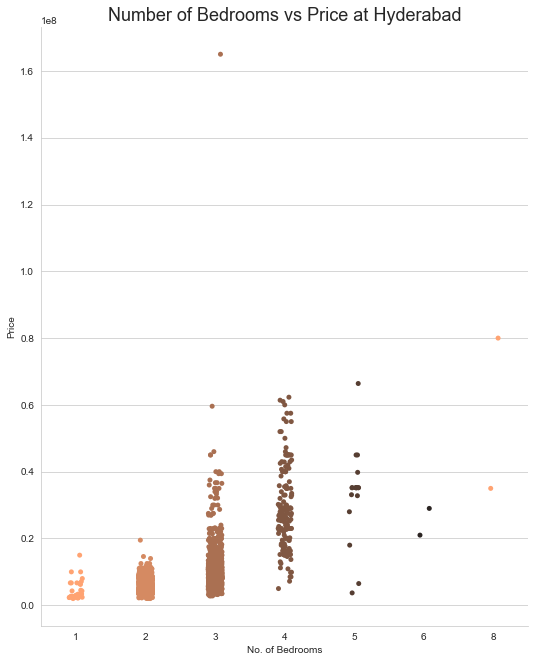

In [61]:
cat_plot(df3,'Hyderabad',hyderabad)

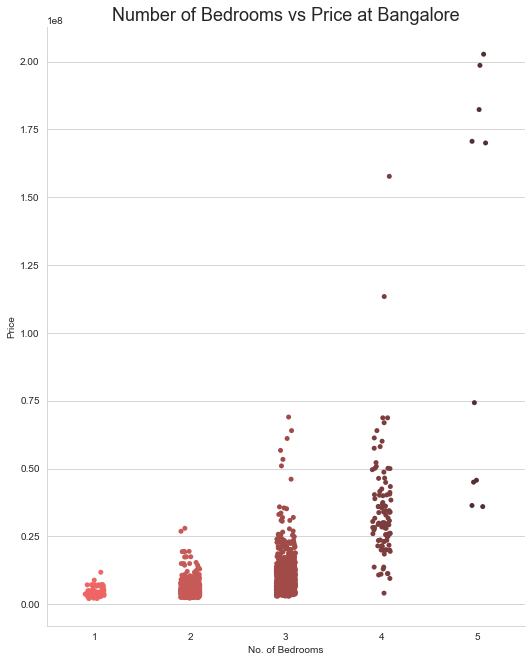

In [62]:
cat_plot(df4,'Bangalore',bangalore)

In [63]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(8,10)
    plt.show()

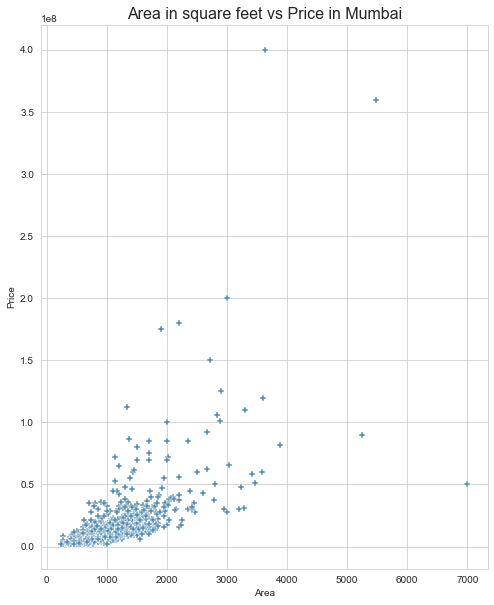

In [64]:
scatter_plot(df1,'Mumbai',custom_colors[0])

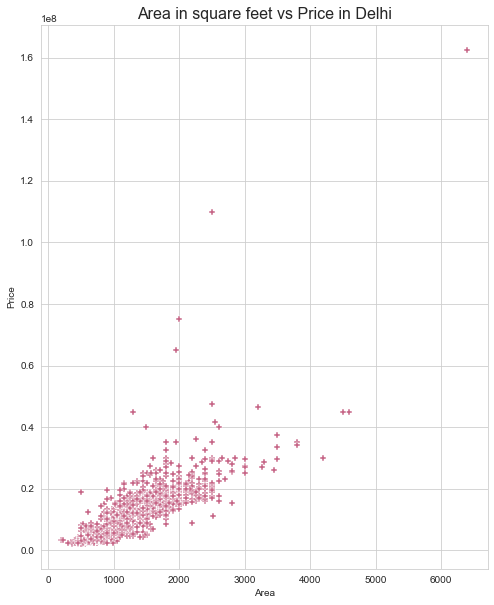

In [65]:
scatter_plot(df2,'Delhi',custom_colors[1])

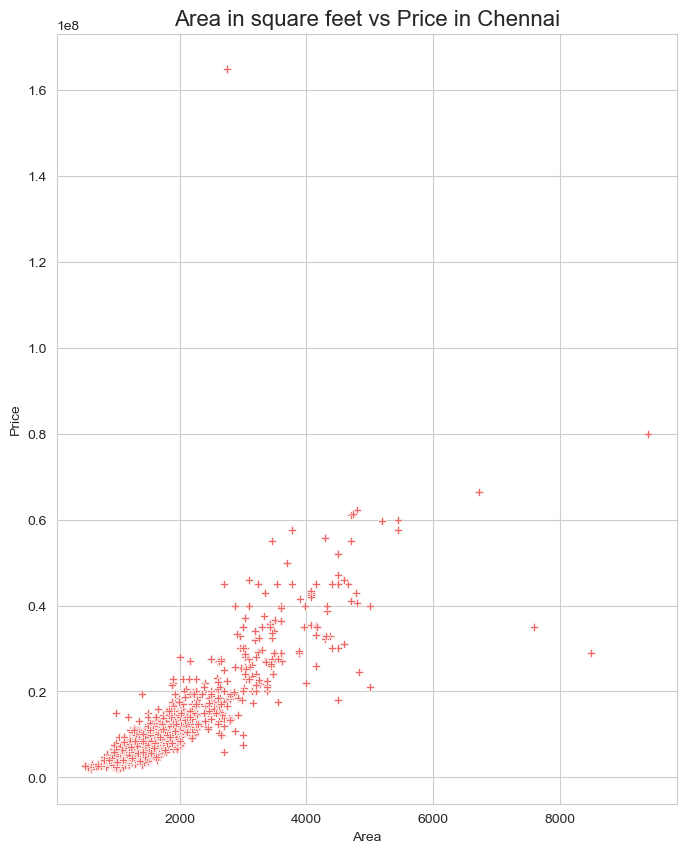

In [44]:
scatter_plot(df3,'Chennai',custom_colors[2])

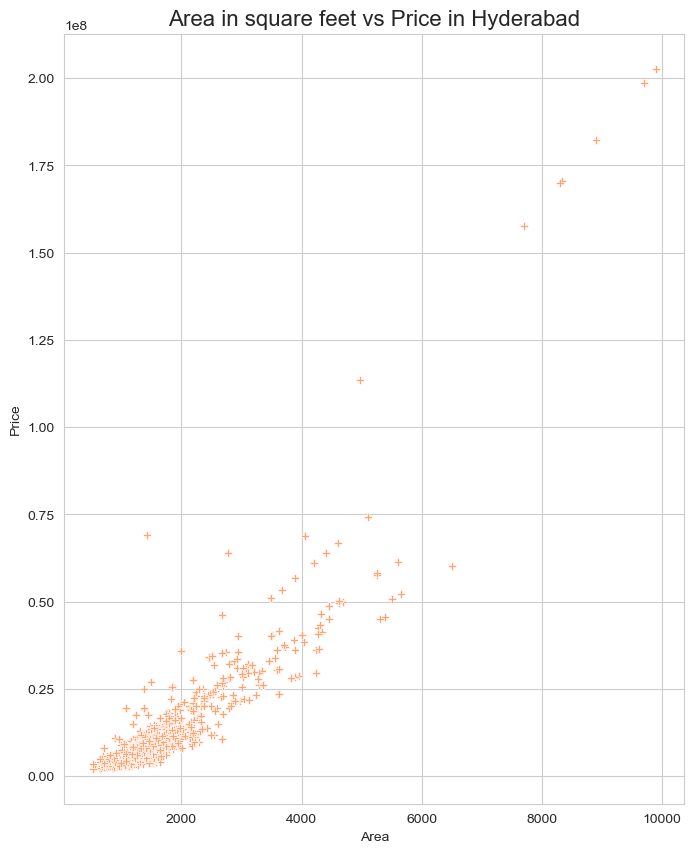

In [45]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

In [46]:
frames = [df1,df2,df3,df4]
merged_ds = pd.concat(frames)
merged_ds = merged_ds.loc[:, ~merged_ds.columns.str.contains('^Unnamed')]

<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>House locations 🗺️</strong></center></h3>
</div>

<div>
<img src="https://i.imgur.com/F2eFcsf.png" width="350" height="350"/>
</div>

In [47]:
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4500000,600,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6700000,650,Kharghar,1,1,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4500000,650,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000000,665,Kharghar,1,1,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div>  
<h3><center style="background-color:#C39BD3; color:white;"><strong>Correlation</strong></center></h3>
</div>

In [48]:
merged_ds.columns
merged_ds = merged_ds.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged_ds = merged_ds.dropna()

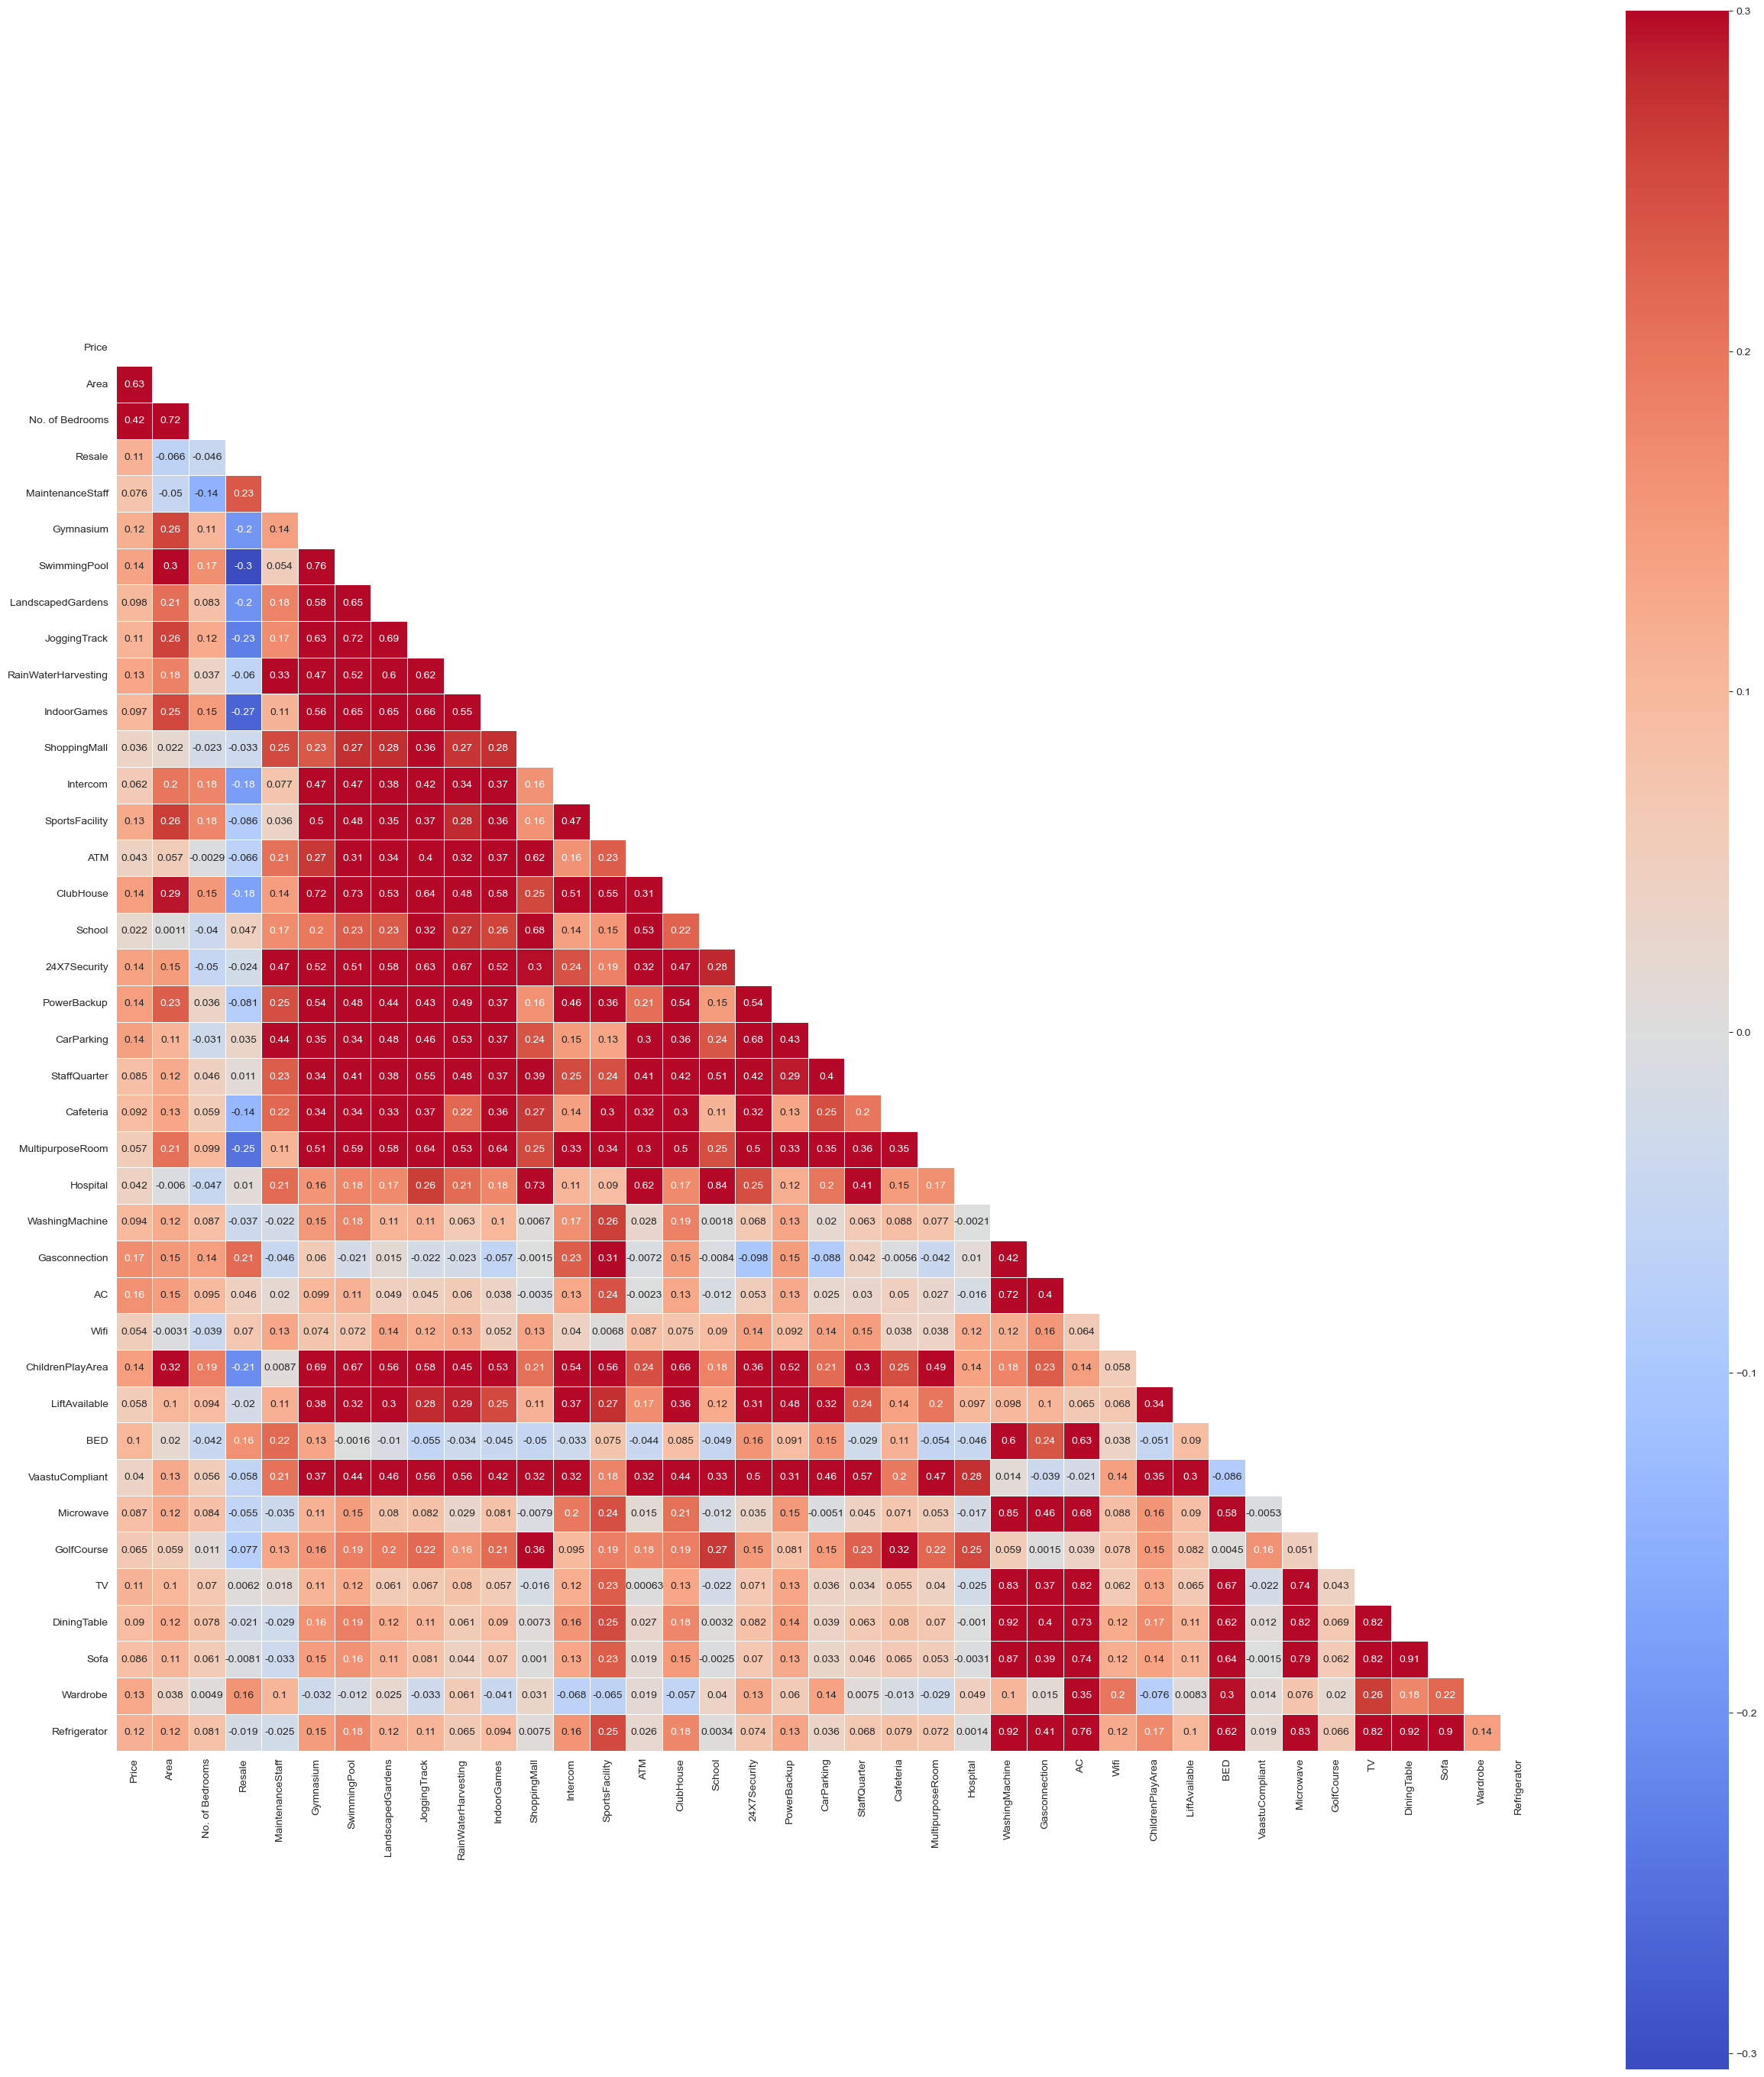

In [49]:
plt.figure(figsize=(30,35))
corr=merged_ds.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(merged_ds.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [50]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

X = merged_ds[feature_names]
y = merged_ds['Price']

In [54]:
X.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,720,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,600,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,650,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,650,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,665,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest

In [55]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

In [56]:
model.score(val_X,val_y)

0.6791454264430613

### XGBRegressor

In [57]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
xgb_r.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
xgb_r.score(val_X,val_y)

0.6492942365478793

### SVM

In [59]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(train_X, train_y)

SVR()

In [60]:
svm.score(val_X,val_y)

-0.06094618632469939

In [61]:
!pip install eli5

In [62]:
import eli5
from eli5.sklearn import PermutationImportance

In [63]:
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
1.3935 ± 0.1667,Area
0.1371 ± 0.0329,LandscapedGardens
0.0816 ± 0.0197,Resale
0.0281 ± 0.0071,SwimmingPool
0.0269 ± 0.0139,VaastuCompliant
0.0260 ± 0.0093,IndoorGames
0.0258 ± 0.0079,No. of Bedrooms
0.0210 ± 0.0110,RainWaterHarvesting
0.0128 ± 0.0037,StaffQuarter
0.0128 ± 0.0082,Refrigerator


We are getting Area , Resale, Swimming Pool and Jogging track as the most important features with Number of Bedrooms. Hence we'll be building our models from that but we'll be traing each model seperately with seperate datasets because we can't make generalist models here but models good for predicting price at a particular city well. So our Streamlit app will have Area , Resale, Swimming Pool, Jogging track as features with seperately trained models

In [ ]:
!pip install -q streamlit

     |████████████████████████████████| 10.3 MB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 41.7 MB/s 
     |████████████████████████████████| 237 kB 47.8 MB/s 
     |████████████████████████████████| 164 kB 48.9 MB/s 
     |████████████████████████████████| 182 kB 49.9 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 


#### Model training on Mumbai dataset 

In [ ]:
pd.unique(df1['Location'])

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [66]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
                 'SwimmingPool','JoggingTrack']

X = df1[feature_names]
y = df1['Price']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
model = RandomForestRegressor().fit(X_train, y_train)

In [69]:
model.score(X_test,y_test)

0.5440542898447659

In [55]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl_mumbai', 'wb') as files:
    pickle.dump(model, files)

#### Streamlit and NGRok activation
Visit ngrok.com


In [56]:
from getpass import getpass
ngrok_auth_token = getpass('Enter ngrok authtoken: ')

KeyboardInterrupt: Interrupted by user

In [ ]:
%cd /content/
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
!tar xvf ngrok-stable-linux-amd64.tgz

/content
--2022-12-08 16:38:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.13M  19.4MB/s    in 0.7s    

2022-12-08 16:38:02 (19.4 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13770165/13770165]

ngrok


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 7.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=9d3af4e7d43a6ac4a2c89050e14278582a08d12913856ca43586a20ed98fa436
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
!pip install streamlit==1.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 6.6 MB/s 
     |████████████████████████████████| 164 kB 73.4 MB/s 
     |████████████████████████████████| 4.7 MB 32.3 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 237 kB 61.4 MB/s 
     |████████████████████████████████| 182 kB 73.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=a43c492d4cf665598ea5ce82e756d5c44f5e3d45fe333922c34e97d97f6b1902
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators


#### Model Training for Delhi

In [ ]:
pd.unique(df2['Location'])

array(['Sector 10 Dwarka', 'Uttam Nagar', 'Sarita Vihar', 'Dwarka Mor',
       'Sector 7 Dwarka', 'Sector 6 Dwarka', 'Sector 5 Dwarka',
       'Sector 23 Rohini', 'Mayur Vihar II', 'Sector 24 Rohini',
       'Sector 11 Dwarka', 'Sector 23 Dwarka', 'Sector 12 Dwarka',
       'West End', 'Sector 9 Rohini', 'Mundka', 'Sector 13 Rohini',
       'Jamia Nagar', 'Sector 19 Dwarka', 'Sector 17 Dwarka', 'Bindapur',
       'Sector-18 Dwarka', 'Vasant Kunj', 'Shastri Nagar',
       'Sector-8 Rohini', 'Sector 9 Dwarka', 'Shanti Park Dwarka',
       'Govindpuri', 'Sector 22 Dwarka', 'Matiala', 'Saket',
       'Mahavir Enclave', 'Burari', 'Shahdara', 'Babarpur', 'Khanpur',
       'Sector 13 Dwarka', 'Mansa Ram Park', 'Green Park', 'Kalkaji',
       'Sector 4 Dwarka', 'DLF Phase 5', 'Sector 3 Dwarka',
       'Chittaranjan Park', 'Chattarpur', 'Greater Kailash',
       'Sector-14 Rohini', 'Paschim Vihar', 'Pitampura',
       'Sector 18B Dwarka', 'Sector 2 Dwarka', 'Jasola',
       'Pochanpur Colony', 

In [57]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
                 'SwimmingPool','JoggingTrack']

X = df2[feature_names]
y = df2['Price']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [59]:
model = RandomForestRegressor().fit(X_train, y_train)

In [60]:
model.score(X_test,y_test)

0.6886678022541999

In [61]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl_delhi', 'wb') as files:
    pickle.dump(model, files)

#### Bangalore Model

In [62]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
                 'SwimmingPool','JoggingTrack']

X = df4[feature_names]
y = df4['Price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
model = RandomForestRegressor().fit(X_train, y_train)

In [65]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl_blr', 'wb') as files:
    pickle.dump(model, files)

In [66]:
pickle_in = open("D:\Projects\Housing_price\Real Estate Price Prediction\model\model_pkl_blr",'rb')
#pickle.load(pickle_in)

In [73]:
model = pickle.load(pickle_in)

In [74]:
x = np.zeros(5)
x[0] = 1000
x[1] = 2
x[2] = 1
x[3] = 1
x[4] = 1
#if loc_index >= 0:
    #   x[loc_index] = 1

print(model.predict([x])[0])

3859674.0681955274


C:\Users\anshu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### Hyderabad Model

In [67]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
                 'SwimmingPool','JoggingTrack']

X = df3[feature_names]
y = df3['Price']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [69]:
model = RandomForestRegressor().fit(X_train, y_train)

In [70]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl_hyd', 'wb') as files:
    pickle.dump(model, files)

#### Streamlit app

In [ ]:
%%writefile app_2.py
import streamlit as st
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np

from PIL import Image



@st.cache(allow_output_mutation=True)
def load_classifier(city):
    if city == 'Mumbai':
        pickle_in = open('/content/model_pkl_mumbai','rb')
    elif city == 'Delhi':
        pickle_in = open('/content/model_pkl_delhi','rb')
    elif city == 'Hyderabad':
        pickle_in = open('/content/model_pkl_hyd','rb')
    elif city == 'Bangalore':
        pickle_in = open('/content/model_pkl_blr','rb')
    
    return pickle.load(pickle_in)

#global classifier
classifier = None


def Welcome():
    return 'WELCOME ALL!'
def predict_price(Area, bhk, resale, pool, jog_track, classifier):   
    """Let's Authenticate the Banks Note 
    This is using docstrings for specifications.
    ---
    parameters:  
      - name: location
        in: query
        type: text
        required: true
      - name: Area
        in: query
        type: number
        required: true
      - name: bhk
        in: query
        type: number
        required: true
      - name: resale
        in: query
        type: number
        required: true
      - name: pool
        in: query
        type: number
        required: true
    responses:
        200:
            description: The output values
        
    """
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(5)
    x[0] = Area
    x[1] = bhk
    x[2] = resale
    x[3] = pool
    x[4] = jog_track
    #if loc_index >= 0:
        #   x[loc_index] = 1

    return classifier.predict([x])[0]
def get_city_options(city):
    if city == 'Mumbai':
        return ['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
                        'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
                        'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
                        'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
                        'Mira Road East', 'Goregaon West', 'Kandivali West',
                        'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
                        'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
                        'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
                        'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
                        'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
                        'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
                        'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
                        'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
                        'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
                        'Sector9 Kamothe', 'Sector 19 Kharghar', 'Navi Basti',
                        'Sector12 Kamothe', 'Sector 21 Kamothe', 'Rutu Enclave',
                        'taloja panchanand', 'Virar West', 'Chembur', 'Sector 20 Kamothe',
                        'Sector 22 Kamothe', 'Sector 18 Kamothe', 'Sector-5 Kamothe',
                        'Sector-6A Kamothe', 'Sector 11 Kamothe', 'Sector-18 Ulwe',
                        'Sector-12 Kamothe', 'azad nagar', 'Sindhi Society Chembur',
                        'Kurla', 'Sahkar Nagar', 'Deonar', 'Thane', 'Jankalyan Nagar',
                        'Badlapur', 'Ambarnath', 'Ambernath West', 'Vakola', 'Kamothe',
                        'Kamothe Sector 16', 'Almeida Park', 'Khar', 'Bandra West',
                        'Pali Hill', '15th Road', 'Palghar', 'Sector13 Kharghar',
                        'Sector 21 Kharghar', 'Sector 12 Kharghar', 'Vivek Vidyalaya Marg',
                        'Vasai east', 'Nahur', 'Badlapur West', 'Panvel', 'Kalyan',
                        'Badlapur East', 'Mira Bhayandar', 'Juhu', 'Naigaon East',
                        'Sector 21 Ulwe', 'Bandra East', 'Dronagiri', 'Nerul', 'Karanjade',
                        'Sanpada', 'Sector-8 Ulwe', 'Sector-3 Ulwe', 'Sector 23 Ulwe',
                        'ULWE SECTOR 19', 'Ghodbunder Road', 'Bhiwandi', 'Vasai',
                        'Nala Sopara', 'Dadar East', 'Ghatkopar', 'Breach Candy',
                        'Worli South Mumbai', 'Asangaon', 'Koparkhairane Station Road',
                        'Kopar Khairane Sector 19A', 'Koper Khairane',
                        'Eastern Express Highway Vikhroli', 'Magathane', 'Rawal Pada',
                        'Ambernath East', 'Dokali Pada', 'Dattapada', 'Rajendra Nagar',
                        'Kulupwadi', 'Samata Nagar Thakur Village', 'Mira Road and Beyond',
                        'West Amardeep Colony', 'Pant Nagar', 'mumbai', 'Four Bungalows',
                        'no 9', 'kolshet', 'Hiranandani Meadows', 'Kalpataru', 'Petali',
                        'Kharghar Sector 34C', 'Ghatkopar East',
                        'Mumbai Agra National Highway', 'vasant vihar thane west',
                        'Kalyan West', 'Shirgaon', 'Pokhran 2', 'juhu tara', 'Peddar Road',
                        'Palm Beach', 'Sector 10', 'Sector 19 Kamothe', 'Tilak Nagar',
                        'Ghatkopar West', 'Tardeo', 'Napeansea Road', 'Mahalaxmi',
                        'Dahisar West', 'Mulund West', 'Natakwala Lane', 'Link Road',
                        'Devidas Cross Lane', 'Soniwadi Road', 'Haridas Nagar', 'Shimpoli',
                        'TPS Road', 'Off Shimpoli road', 'Rustomjee Global City',
                        'Sunil Nagar', 'Sector 30 Kharghar', 'Sector 12 A', 'Sector 18',
                        'Sector13 Khanda Colony', 'Sector16 Airoli', 'Ranjanpada',
                        'Sector 15', 'Sector 35G', 'Sector 5', 'Sector 35I Kharghar',
                        'Sector35D Kharghar', 'Sector34 A Kharghar', 'Sector 30',
                        'Sector 36 Kharghar', 'Sector 11 Belapur', 'Sector-34B Kharghar',
                        'Dombivali East', 'Roadpali', 'Sector-50 Seawoods',
                        'Mumbai Highway', 'Sector 7 Kharghar', 'Lokhandwala Township',
                        'Andheri', 'Andheri West', 'Shastri Nagar', 'Wadala East Wadala',
                        'Kalwa', 'PARSIK NAGAR', 'Maharashtra Nagar', 'Patlipada',
                        'Belapur', 'Seawoods', 'Majiwada', '4 Bunglows', 'Airoli',
                        'Kolshet Road', 'Sector 10 Khanda Colony', 'Pokharan Road',
                        'Kharegaon', 'Panch Pakhadi', 'Sector 36 Kamothe',
                        'Dombivli (West)', 'DN Nagar Road', 'Godrej Hill', 'Ganesh Nagar',
                        'Haware City', 'Mahatma Gandhi Road', 'Akurli Nagar',
                        'Kasar vadavali', 'Vasai West', 'Mumbai Nashik Expressway',
                        'Katrap', 'Mira Road', 'Kasheli',
                        'Western Express Highway Kandivali East', 'Vasind', 'KASHELI',
                        'Thakurli', 'Shakti Nagar', 'Bhayandar East', 'Dahisar East',
                        'ulhasnagar 4', 'Sector-26 Taloja', 'Koproli']
    elif city == 'Delhi':
        return ['Sector 10 Dwarka', 'Uttam Nagar', 'Sarita Vihar', 'Dwarka Mor',
                          'Sector 7 Dwarka', 'Sector 6 Dwarka', 'Sector 5 Dwarka',
                          'Sector 23 Rohini', 'Mayur Vihar II', 'Sector 24 Rohini',
                          'Sector 11 Dwarka', 'Sector 23 Dwarka', 'Sector 12 Dwarka',
                          'West End', 'Sector 9 Rohini', 'Mundka', 'Sector 13 Rohini',
                          'Jamia Nagar', 'Sector 19 Dwarka', 'Sector 17 Dwarka', 'Bindapur',
                          'Sector-18 Dwarka', 'Vasant Kunj', 'Shastri Nagar',
                          'Sector-8 Rohini', 'Sector 9 Dwarka', 'Shanti Park Dwarka',
                          'Govindpuri', 'Sector 22 Dwarka', 'Matiala', 'Saket',
                          'Mahavir Enclave', 'Burari', 'Shahdara', 'Babarpur', 'Khanpur',
                          'Sector 13 Dwarka', 'Mansa Ram Park', 'Green Park', 'Kalkaji',
                          'Sector 4 Dwarka', 'DLF Phase 5', 'Sector 3 Dwarka',
                          'Chittaranjan Park', 'Chattarpur', 'Greater Kailash',
                          'Sector-14 Rohini', 'Paschim Vihar', 'Pitampura',
                          'Sector 18B Dwarka', 'Sector 2 Dwarka', 'Jasola',
                          'Pochanpur Colony', 'Palam', 'Saidabad', 'Budh Vihar',
                          'Sector 25 Rohini', 'Sector 18A Dwarka', 'Sewak Park',
                          'Sector 23B Dwarka', 'Rohini sector 24', 'Sector 28 Rohini',
                          'Rohini Sector 9', 'Rohini Extension', 'nawada', 'Alaknanda',
                          'Sector 22 Rohini', 'Lajpat Nagar', 'South Extension 2',
                          'Sector 16B Dwarka', 'Sheikh Sarai', 'Sidhartha Nagar',
                          'Sector-D Vasant Kunj', 'Hauz Khas', 'Kalkaji Extension',
                          'Greater kailash 1', 'Lajpat Nagar III', 'Safdarjung Enclave',
                          'Greater Kailash II', 'Sainik Farms', 'Sector 20 Rohini',
                          'greater kailash Enclave 1', 'DLF Farms', 'Mehrauli', 'Mahipalpur',
                          'mayur vihar phase 1', 'Sarvodaya Enclave', 'Karol Bagh',
                          'West Sagarpur', 'Ashok Vihar', 'Sector 21 Dwarka',
                          'East of Kailash', 'Khirki Extension', 'Dashrath Puri',
                          'SULTANPUR', 'Patparganj', 'Kaushambi', 'Shakurbasti',
                          'Hari Nagar', 'Siri Fort', 'Katwaria Sarai', 'Mayur Vihar',
                          'Nasirpur']
    elif city == 'Hyderabad':
         return ['Nizampet', 'Hitech City', 'Manikonda', 'Alwal', 'Kukatpally',
              'Gachibowli', 'Tellapur', 'Kokapet', 'Hyder Nagar', 'Mehdipatnam',
              'Narsingi', 'Khajaguda Nanakramguda Road', 'Madhapur',
              'Puppalaguda', 'Begumpet', 'Banjara Hills', 'AS Rao Nagar',
              'Pragathi Nagar Kukatpally', 'Miyapur', 'Mallampet',
              'Nanakramguda', 'Attapur', 'West Marredpally', 'Kompally',
              'Sri Nagar Colony', 'Hakimpet', 'Pocharam', 'Nagole', 'LB Nagar',
              'Meerpet', 'Kachiguda', 'Masab Tank', 'Kondapur', 'Saroornagar',
              'Uppal Kalan', 'Mallapur', 'Rajendra Nagar', 'Beeramguda',
              'Moosapet', 'Bachupally', 'Toli Chowki', 'Lakdikapul', 'Tarnaka',
              'Kistareddypet', 'Hafeezpet', 'Shaikpet', 'Amberpet', 'Kapra',
              'Trimalgherry', 'Habsiguda', 'Sanath Nagar', 'Darga Khaliz Khan',
              'Kothaguda', 'Balanagar', 'Jubilee Hills', 'raidurgam',
              'Murad Nagar', 'Chandanagar', 'East Marredpally', 'Aminpur',
              'Gajularamaram', 'Serilingampally', 'Malkajgiri', 'Mettuguda',
              'Venkat Nagar Colony', 'Kondakal', 'Gopanpally', 'Somajiguda',
              'Nallagandla Gachibowli', 'Krishna Reddy Pet', 'Bolarum',
              'Zamistanpur', 'Madhura Nagar', 'Ghansi Bazaar', 'Chintalakunta',
              'Chinthal Basthi', 'Nallakunta', 'Bowenpally', 'Bandlaguda Jagir',
              'Boduppal', 'Neknampur', 'Appa Junction Peerancheru',
              'Ambedkar Nagar', 'Vanasthalipuram', 'Moula Ali', 'Gandipet',
              'Nacharam', 'Appa Junction', 'Qutub Shahi Tombs', 'Abids',
              'Dilsukh Nagar', 'Quthbullapur', 'Sainikpuri', 'KTR Colony',
              'Bollaram', 'Karmanghat', 'Gajulramaram Kukatpally', 'Uppal',
              'Cherlapalli', 'Himayat Nagar', 'Rhoda Mistri Nagar', 'Chintalmet',
              'Hitex Road', 'ECIL', 'Boiguda', 'ECIL Main Road',
              'ECIL Cross Road', 'Rajbhavan Road Somajiguda',
              'Ramachandra Puram', 'TellapurOsman Nagar Road', 'Mansoorabad',
              'KRCR Colony Road', 'Pragati Nagar', 'Padmarao Nagar',
              'Paramount Colony Toli Chowki', 'BK Guda Internal Road',
              'muthangi', 'Pragathi Nagar', 'Yapral', 'Narayanguda', 'Kollur',
              'Bachupally Road', 'Old Bowenpally', 'Alapathi Nagar',
              'Arvind Nagar Colony', 'Matrusri Nagar', 'Pragathi Nagar Road',
              'Padma Colony', 'Happy Homes Colony', 'Old Nallakunta',
              'Sangeet Nagar', 'NRSA Colony', 'Adibatla', 'Methodist Colony',
              'Ameerpet', 'ALIND Employees Colony', 'Khizra Enclave', 'Medchal',
              'Dammaiguda', 'Suchitra', 'Whitefields', 'Mayuri Nagar',
              'Adda Gutta', 'Miyapur HMT Swarnapuri Colony',
              'Central Excise Colony Hyderabad', 'Basheer Bagh', 'Gopal Nagar',
              'Bachupaly Road Miyapur', 'Kushaiguda', 'Ashok Nagar',
              'Barkatpura', 'Madinaguda', 'Bagh Amberpet', 'new nallakunta',
              'BHEL', 'Sun City', 'Hydershakote', 'BK Guda Road',
              'Nallagandla Road', 'IDPL Colony', 'Ramnagar Gundu',
              'Alkapur township', 'Banjara Hills Road Number 12',
              'Panchavati Colony Manikonda', 'New Maruthi Nagar',
              'Madhavaram Nagar Colony', 'Miyapur Bachupally Road',
              'nizampet road', 'Kokapeta Village', 'HMT Hills', 'Tilak Nagar',
              'Chititra Medchal', 'Isnapur', 'D D Colony', 'DD Colony',
              'Patancheru Shankarpalli Road', 'Patancheru', 'Jhangir Pet',
              'Almasguda', 'Allwyn Colony', 'financial District',
              'Beeramguda Road', 'Pati', 'Karimnagar', 'Kollur Road',
              'Sun City Padmasri Estates', 'Chaitanyapuri', 'Nandagiri Hills',
              'Whitefield', 'Film Nagar', 'Kismatpur', 'Dr A S Rao Nagar Rd',
              'Dullapally', 'KPHB', 'Vivekananda Nagar Colony', 'Ameenpur',
              'Chintradripet', 'Ring Road', 'Saket', 'Kavuri Hills', 'manneguda',
              'Moti Nagar', 'Usman Nagar', 'Shadnagar', 'Bongloor',
              'Mailardevpally', 'Uppalguda', 'Tirumalgiri', 'Chikkadapally',
              'JNTU', 'hyderabad', 'Shamshabad', 'Srisailam Highway',
              'Domalguda', 'Lingampalli', 'Residential Flat Machavaram',
              'Whisper Valley', 'Tukkuguda Airport View Point Road',
              'Santoshnagar', 'Tolichowki', 'Domalguda Road', 'Shankarpalli',
              'Kothapet', 'Baghlingampally', 'Picket', 'Safilguda',
              'Sikh Village', 'Neredmet', 'Macha Bolarum', 'Kowkur',
              'Rakshapuram', 'west venkatapuram', 'Vidyanagar Adikmet',
              'Aushapur', 'Old Alwal', 'Secunderabad Railway Station Road',
              'Balapur', 'Hastinapur', 'chandrayangutta']

    elif city == 'Bangalore':
        return ['JP Nagar Phase 1', 'Dasarahalli on Tumkur Road',
              'Kannur on Thanisandra Main Road', 'Doddanekundi', 'Kengeri',
              'Horamavu', 'Thanisandra', 'Ramamurthy Nagar',
              'Whitefield Hope Farm Junction', 'Electronic City Phase 1',
              'Yelahanka', 'Anjanapura', 'Jalahalli', 'Kasavanahalli',
              'Bommasandra', 'Bellandur', 'RR Nagar', 'Begur', 'Hosa Road',
              'Sahakar Nagar', 'Kadugodi', 'Jakkur', 'Jigani', 'Krishnarajapura',
              'Brookefield', 'Banashankari', 'Nelamangala', 'Attibele',
              'Banaswadi', 'Kodigehalli', 'ITPL', 'Uttarahalli Hobli',
              'Chikkagubbi on Hennur Main Road', 'Varthur', 'Vidyaranyapura',
              'Electronic City Phase 2', 'J. P. Nagar', 'K. Chudahalli',
              'Narayanaghatta', 'Anekal City', 'Sarjapur', 'Koramangala',
              'Hebbal', 'Budigere Cross', 'Bommanahalli', 'Electronics City',
              'Chikkalasandra', 'Kogilu', 'Nayandahalli', 'Bilekahalli',
              'Muneshwara Nagar', 'Junnasandra',
              'Narayanapura on Hennur Main Road', 'Kothanur',
              'Kadugodi Industrial Area',
              'Sarjapur Road Wipro To Railway Crossing', 'RMV Extension Stage 2',
              'Kudlu', 'Talaghattapura', 'Kumbalgodu', 'Carmelaram',
              'Uttarahalli', 'Anagalapura Near Hennur Main Road',
              'Avalahalli Off Sarjapur Road', 'R T  Nagar', 'JP Nagar Phase 7',
              'Subramanyapura', 'JP Nagar Phase 4', 'JP Nagar Phase 8',
              'Amruthahalli', 'Nagarbhavi', 'Chandapura', 'Marsur',
              'JP Nagar Phase 3', 'JP Nagar Phase 9', 'Gottigere',
              'Kanakapura Road Beyond Nice Ring Road', 'Harlur', 'Konanakunte',
              'Richmond Town', 'Jayanagar', 'Domlur', 'Devanahalli', 'Hulimavu',
              'Kumaraswamy Layout', 'Bikasipura', 'Singasandra',
              'JP Nagar Phase 6', 'Sanjaynagar', 'CV Raman Nagar',
              'Padmanabhanagar', 'Hennur', 'KPC Layout', 'R.K. Hegde Nagar',
              'Kannamangala', 'Yerthiganahalli', 'Badamanavarthekaval',
              'Kanakapura', 'Bannerughatta', 'BTM Layout',
              'Kuvempu Layout on Hennur Main Road', 'Marathahalli',
              'Rajajinagar', 'Whitefield', 'RMV']
        
def main():
    
    # Image file path
    img_file = "/content/1_5lksNVWUW8prwtwOAiq1pQ.jpeg"

    # Open the image
    img = Image.open(img_file)

  

    # Display the image
    st.image(img)
    
    st.title("House Rate Prediction")
    html_temp = """
    <h2 style="color:black;text-align:left;"> Streamlit House prediction ML App </h2>
    """

    st.markdown(html_temp,unsafe_allow_html=True)
    st.subheader('Please enter the required details:')
    city = st.selectbox(
    label="Select a city",
    options=['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad']
    )

    classifier = load_classifier(city)
    
    #location = st.text_input("Location","")
    Location = st.selectbox(
               label = "Select Available locality",
               options = get_city_options(city)
    )

    
    try:
        area = float(st.text_input("Sq-ft area",""))
    except ValueError:
        st.write("Please enter a number for the area.")
    
   
    try:
        bhk = float(st.text_input("Number of BHK",""))
    except ValueError:
        st.write("Please enter a number for the Bedrooms.")
    
    #resale = st.text_input("Whether the flat is resale or New")
    resale = st.selectbox(
               label = "Whether the flat is resale or New. (0 if No, 1 if Yes)",
               options = ['0','1']
    )
    pool = st.selectbox(
               label = "Whether the flat has Pool or not. (0 if No, 1 if Yes)",
               options = ['0','1']
    )
    jog_track = st.selectbox(
               label = "Whether the flat has Jogging Track or not. (0 if No, 1 if Yes)",
               options = ['0','1']
    )
    result=""

    if st.button("House Price in Lakhs"):
        result=predict_price(area, bhk, resale, pool, jog_track, classifier)
        # Convert the result to an integer
        result = int(result)
       
    st.success('The Price of the house is in INR {}'.format(result))


if __name__=='__main__':
    main()

Writing app_2.py


In [ ]:
# %cd Covid-19-Radiology
from pyngrok import ngrok
!ngrok authtoken $ngrok_auth_token
# !nohup streamlit run app.py & 

public_url = ngrok.connect(port = 8501)
print(public_url) #generates our URL

!streamlit run --server.port 80 app_2.py --server.enableCORS=false server.enableXsrfProtection=false >/dev/null 

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
NgrokTunnel: "http://740c-34-125-253-83.ngrok.io" -> "http://localhost:80"
2022-12-08 16:40:59.550 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
2022-12-08 16:41:00.878 
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
